In [8]:
# Lung Cancer Prediction 

"""Author: Shalini Saurav  
   Purpose: Build classification models to predict lung cancer (YES/NO) from a questionnaire dataset."""

'Author: Shalini Saurav  \n   Purpose: Build classification models to predict lung cancer (YES/NO) from a questionnaire dataset.'

### IMPORTING LIBRARIES

In [9]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### LOADING DATASET

In [11]:
# LOADING DATASET....

# Load dataset
df = pd.read_csv("survey lung cancer (1).csv")

# Show first 5 rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### DATA EXPLORATION

In [13]:
## Basic Exploration...........

# Shape
print("Shape of dataset:", df.shape)

# Column info
print("\nColumn data types:\n", df.dtypes)

# Unique values for each column
for col in df.columns:
    print(f"\nUnique values in {col}: {df[col].unique()}")

# Statistical summary
df.describe()

Shape of dataset: (309, 16)

Column data types:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

Unique values in GENDER: ['M' 'F']

Unique values in AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]

Unique values in SMOKING: [1 2]

Unique values in YELLOW_FINGERS: [2 1]

Unique values in ANXIETY: [2 1]

Unique values in PEER_PRESSURE: [1 2]

Unique values in CHRONIC DISEASE: [1 2]

Unique values in FATIGUE : [2 1]

Unique values in ALLERGY 

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### DATA CLEANING AND PREPROCESSING

In [15]:
##- Data Preprocessing.....

# Make a copy of dataset
data = df.copy()

# 1. Fix column names (remove extra spaces)
data.columns = data.columns.str.strip()

# 2. Encode Gender (M=1, F=0)
data["GENDER"] = data["GENDER"].map({"M":1, "F":0})

# 3. Encode Target (YES=1, NO=0)
data["LUNG_CANCER"] = data["LUNG_CANCER"].map({"YES":1, "NO":0})

# 4. Convert 1/2 values -> 0/1 for binary columns
binary_cols = [col for col in data.columns if col not in ["AGE", "LUNG_CANCER"]]

for col in binary_cols:
    data[col] = data[col].map({1:0, 2:1})  # 1->0, 2->1

# Check again
print(data.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     0.0   69        0               1        1              0   
1     0.0   74        1               0        0              0   
2     NaN   59        0               0        0              1   
3     0.0   63        1               1        1              0   
4     NaN   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    1                      1    

### TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = data.drop("LUNG_CANCER", axis=1)   # All columns except target
y = data["LUNG_CANCER"]                # Target column

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (247, 15)
Test shape: (62, 15)


#### DATA IMPUTAION [ MISSING VALUES EXIST ]

In [60]:
# Drop missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # same index match karna zaruri hai

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [62]:
"""from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline with imputer + scaler + logistic regression
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # mean [IMPUTATION OF DATA]
    ("scaler", StandardScaler()),                  # scale 
    ("log_reg", LogisticRegression(max_iter=1000))
])

# Fit model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)"""


'from sklearn.impute import SimpleImputer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\n\n# Pipeline with imputer + scaler + logistic regression\npipeline = Pipeline([\n    ("imputer", SimpleImputer(strategy="mean")),   # mean [IMPUTATION OF DATA]\n    ("scaler", StandardScaler()),                  # scale \n    ("log_reg", LogisticRegression(max_iter=1000))\n])\n\n# Fit model\npipeline.fit(X_train, y_train)\n\n# Predictions\ny_pred = pipeline.predict(X_test)'

###  Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9117647058823529

Confusion Matrix:
 [[ 2  3]
 [ 0 29]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.91      1.00      0.95        29

    accuracy                           0.91        34
   macro avg       0.95      0.70      0.76        34
weighted avg       0.92      0.91      0.90        34



### DECISION TREE 

In [38]:
# Decision Tree Classifier.......

from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Train model
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.7941176470588235

Confusion Matrix:
 [[ 1  4]
 [ 3 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.87      0.90      0.88        29

    accuracy                           0.79        34
   macro avg       0.56      0.55      0.55        34
weighted avg       0.78      0.79      0.78        34



### RANDOM FOREST CLASSIFIER

In [42]:
# Random Forest Classifier.....

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9117647058823529

Confusion Matrix:
 [[ 3  2]
 [ 1 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.93      0.97      0.95        29

    accuracy                           0.91        34
   macro avg       0.84      0.78      0.81        34
weighted avg       0.91      0.91      0.91        34



### SUPPORT VECTOR MACHINE

In [47]:
# Support Vector Machine......

from sklearn.svm import SVC

# Initialize model (RBF kernel is default)
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Train model
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.8529411764705882

Confusion Matrix:
 [[ 0  5]
 [ 0 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        29

    accuracy                           0.85        34
   macro avg       0.43      0.50      0.46        34
weighted avg       0.73      0.85      0.79        34



### K-NEAREST NEIGHBOUR

In [49]:
#  - KNN Classifier.....

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale data (important for KNN & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model (k=5 default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.8529411764705882

Confusion Matrix:
 [[ 0  5]
 [ 0 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        29

    accuracy                           0.85        34
   macro avg       0.43      0.50      0.46        34
weighted avg       0.73      0.85      0.79        34



### NAIVE BAIS CLASSIFIER

In [53]:
#  Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

# Initialize model
nb = GaussianNB()

# Train model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.8823529411764706

Confusion Matrix:
 [[ 3  2]
 [ 2 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.93      0.93      0.93        29

    accuracy                           0.88        34
   macro avg       0.77      0.77      0.77        34
weighted avg       0.88      0.88      0.88        34



### Model Comparison

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy="mean")  # ya "median"
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale after imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Define Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Train & Evaluate

results = {}

for name, model in models.items():
    if name in ["KNN", "SVM"]:   # Need scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = round(acc, 4)

# Convert to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

                 Model  Accuracy
0  Logistic Regression    0.9118
1        Decision Tree    0.7941
2        Random Forest    0.9118
3                  SVM    0.8529
4                  KNN    0.8529
5          Naive Bayes    0.8824


### Visualization of Model Performance

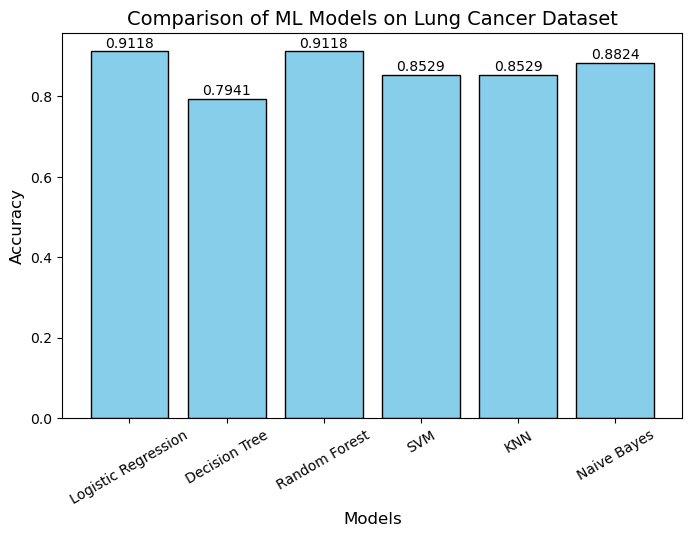

In [71]:
# Bar Chart for Model Accuracy

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["Accuracy"], color="skyblue", edgecolor="black")

# Labels and Title
plt.title("Comparison of ML Models on Lung Cancer Dataset", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=30)

# Show accuracy values on bars
for i, acc in enumerate(results_df["Accuracy"]):
    plt.text(i, acc+0.01, str(acc), ha='center', fontsize=10)

plt.show()

### SAVE MODEL

In [74]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Common preprocessing steps
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

# Models dictionary
models = {
    "Logistic_Regression": LogisticRegression(max_iter=1000),
    "Decision_Tree": DecisionTreeClassifier(),
    "Random_Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive_Bayes": GaussianNB()
}

In [76]:
for name, model in models.items():
    # Pipeline with imputer + scaler + model
    pipeline = Pipeline([
        ("imputer", imputer),
        ("scaler", scaler),
        ("model", model)
    ])
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Save
    filename = f"{name}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Saved {name} as {filename}")

✅ Saved Logistic_Regression as Logistic_Regression.pkl
✅ Saved Decision_Tree as Decision_Tree.pkl
✅ Saved Random_Forest as Random_Forest.pkl
✅ Saved SVM as SVM.pkl
✅ Saved KNN as KNN.pkl
✅ Saved Naive_Bayes as Naive_Bayes.pkl


### Load Model & Predict [Future use]

In [79]:
# Example: Load Random Forest model
loaded_rf = joblib.load("Random_Forest.pkl")

# Test Accuracy
print("Random Forest Accuracy:", loaded_rf.score(X_test, y_test))

# Predict new sample
# new_data = [[age, gender, smoking, ...]]  # apne features ke hisaab se
# print("Prediction:", loaded_rf.predict(new_data))

Random Forest Accuracy: 0.9117647058823529
